## Import

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import os
import matplotlib.pyplot as plt

LST20 Dataset

In [ ]:
!gdown --id 1aQDNH0M8Xg6bIG4Ao_-BMF3a8Or3-sVz

Downloading...
From: https://drive.google.com/uc?id=1aQDNH0M8Xg6bIG4Ao_-BMF3a8Or3-sVz
To: /content/LST20.tar.gz
100% 12.3M/12.3M [00:00<00:00, 35.7MB/s]


In [ ]:
!tar -xf '/content/LST20.tar.gz'
print("Extraction complete")

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.metadata:kMDItemWhereFroms'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.metadata:kMDItemDownloadedDate'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keywor

In [ ]:
def file_news_type(news_type):
    return news_meta[news_meta['Type'] == news_type]['File'].to_list()

news_meta = pd.read_csv('./LST20_Corpus/genres.txt', sep='\t', names=['File', 'Type'])
news_path = file_news_type('entertainment')

In [ ]:
titles = []
for path in news_path:
    full_path = f'./LST20_Corpus/train/{path}'
    if os.path.isfile(full_path):
        with open(full_path, 'r') as file:
            titles.append(([word.split('\t')[:-1] for word in file.read().split('\n\n')[0].split('\n')]))
        continue
      
    full_path = f'./LST20_Corpus/eval/{path}'
    if os.path.isfile(full_path):
        with open(full_path, 'r') as file:
            titles.append(([word.split('\t')[:-1] for word in file.read().split('\n\n')[0].split('\n')]))
        continue
            
    full_path = f'./LST20_Corpus/test/{path}'
    if os.path.isfile(full_path):
        with open(full_path, 'r') as file:
            titles.append(([word.split('\t')[:-1] for word in file.read().split('\n\n')[0].split('\n')]))
        continue

In [ ]:
titles[:5]

[[['ตีพิมพ์', 'VV', 'O'],
  ['ภาพ', 'NN', 'O'],
  ['ลูกสาว', 'NN', 'O'],
  ['"', 'PU', 'O'],
  ['ทอม', 'NN', 'B_PER'],
  ['_', 'PU', 'I_PER'],
  ['ครูซ', 'NN', 'E_PER'],
  ['"', 'PU', 'O'],
  ['ครั้ง', 'CL', 'O'],
  ['แรก', 'NU', 'O'],
  ['บน', 'PS', 'O'],
  ['นิตยสาร', 'NN', 'O'],
  ['วานิตี้', 'NN', 'O'],
  ['แฟร์', 'NN', 'O']],
 [['"', 'PU', 'O'],
  ['ความ', 'FX', 'O'],
  ['สุข', 'VV', 'O'],
  ['ของ', 'PS', 'O'],
  ['กะทิ', 'NN', 'O'],
  ['"', 'PU', 'O'],
  ['ซิว', 'VV', 'O'],
  ['ซีไรต์', 'NN', 'O'],
  ['กรรมการ', 'NN', 'O'],
  ['เผย', 'VV', 'O'],
  ['ยัง', 'AX', 'O'],
  ['มี', 'VV', 'O'],
  ['จุด', 'NN', 'O']],
 [['"', 'PU', 'O'],
  ['แก้ว', 'NN', 'B_PER'],
  ['-', 'PU', 'O'],
  ['อภิรดี', 'NN', 'B_PER'],
  ['"', 'PU', 'O'],
  ['ห่วง', 'VV', 'O'],
  ['ลูก', 'NN', 'O'],
  ['เลื่อน', 'VV', 'O'],
  ['แถลง', 'VV', 'O'],
  ['หย่า', 'VV', 'O']],
 [['วงการ', 'NN', 'O'],
  ['ศิลปิน', 'NN', 'O'],
  ['พื้นบ้าน', 'AJ', 'O'],
  ['สูญเสีย', 'VV', 'O'],
  ['_', 'PU', 'O'],
  ['"', 'PU', 'O'],
 

In [ ]:
def nerExtractor(titleObj):
  allner = []
  templist = []
  keptType = ''
  gluemode = False
  for token in titleObj:
    if token[2].startswith('B') and gluemode == False:
      templist.append(token[0])
      try: 
        keptType = token[2].split('_')[1]
      except:
        keptType = '??'
      gluemode = True
    elif token[2].startswith('E') and gluemode==True:
      templist.append(token[0])
      allner.append((''.join(templist), keptType))
      templist = []
      gluemode = False
    elif token[2].startswith('O') and gluemode==True:
      allner.append((''.join(templist), keptType))
      templist = []
      gluemode = False
    elif gluemode==True:
      templist.append(token[0])
  return allner

In [ ]:
nerlist = []
for ind,oneTitle in enumerate(titles):
  extract_result = nerExtractor(oneTitle)
  percount = 0
  for element in extract_result:
    if element[1]=='PER':
      percount = percount+1
  if percount==2:
    nerlist.append((ind,extract_result))

In [ ]:
for filtered_news in nerlist:
  print(filtered_news[0],end=',')

2,4,7,15,24,29,33,34,37,44,47,51,55,63,65,66,68,72,73,76,77,83,84,87,88,89,90,91,93,95,96,99,106,109,110,111,112,116,117,119,121,122,123,125,127,128,130,132,133,144,148,150,151,160,163,166,167,169,170,171,172,175,178,180,183,184,185,187,189,190,191,192,193,194,198,199,202,203,204,208,209,210,216,218,219,220,224,226,229,235,238,241,242,246,251,252,257,259,266,269,273,275,278,282,284,285,287,290,292,294,295,306,311,315,321,322,331,332,336,337,338,341,343,345,351,352,353,355,357,364,366,369,373,374,376,377,378,379,380,384,386,390,393,396,398,399,401,410,412,415,416,419,420,424,425,427,430,438,445,447,449,450,452,457,458,460,465,466,467,470,471,474,481,486,487,491,492,499,500,505,507,509,510,515,516,518,519,520,521,523,

# Semi-supervised learning demo: Clean data for knowledge graph

In [ ]:
selected_index = [2,4,7,15,24,29,33,34,37,44,47,51,55,63,65,66,68,72,73,76,77,83,84,87,88,89,90,91,93,95,96,99,106,109,110,111,112,116,117,119,121,122,123,125,127,128,130,132,133,144,148,150,151,160,163,166,167,169,170,171,172,175,178,180,183,184,185,187,189,190,191,192,193,194,198,199,202,203,204,208,209,210,216,218,219,220,224,226,229,235,238,241,242,246,251,252,257,259,266,269,273,275,278,282,284,285,287,290,292,294,295,306,311,315,321,322,331,332,336,337,338,341,343,345,351,352,353,355,357,364,366,369,373,374,376,377,378,379,380,384,386,390,393,396,398,399,401,410,412,415,416,419,420,424,425,427,430,438,445,447,449,450,452,457,458,460,465,466,467,470,471,474,481,486,487,491,492,499,500,505,507,509,510,515,516,518,519,520,521,523]

In [ ]:
for i in selected_index:
  print("Index",i)
  os.system('cls')
  for j in titles[i]:
    print(j)
  input("Press to continue")

Index 2
['"', 'PU', 'O']
['แก้ว', 'NN', 'B_PER']
['-', 'PU', 'O']
['อภิรดี', 'NN', 'B_PER']
['"', 'PU', 'O']
['ห่วง', 'VV', 'O']
['ลูก', 'NN', 'O']
['เลื่อน', 'VV', 'O']
['แถลง', 'VV', 'O']
['หย่า', 'VV', 'O']
Press to continueก
Index 4
['"', 'PU', 'O']
['กบ', 'NN', 'B_PER']
['-', 'PU', 'O']
['สุวนันท์', 'NN', 'B_PER']
['"', 'PU', 'O']
['ลั่น', 'VV', 'O']
['ฟ้อง', 'VV', 'O']
['นสพ.', 'NN', 'O']
['ฐาน', 'NN', 'O']
['กล่าวหา', 'VV', 'O']
['ซื้อ', 'VV', 'O']
['ใบ', 'NN', 'O']
['ผู้', 'FX', 'O']
['ประกาศ', 'VV', 'O']
['กรม', 'NN', 'B_ORG']
['ประชา', 'NN', 'I_ORG']
['ฯ', 'PU', 'E_ORG']
Press to continueก
Index 7
['"', 'PU', 'O']
['ลิฟท์', 'NN', 'B_PER']
['กับ', 'PS', 'O']
['ออย', 'NN', 'B_PER']
['"', 'PU', 'O']
['2', 'NU', 'B_NUM']
['_', 'PU', 'O']
['ดารา', 'NN', 'O']
['ดัง', 'VV', 'O']
['_', 'PU', 'O']
['แห่', 'VV', 'O']
['ถวาย', 'VV', 'O']
['ระฆัง', 'NN', 'O']
['วัด', 'NN', 'B_ORG']
['นิยม', 'NN', 'E_ORG']
Press to continueก
Index 15
['"', 'PU', 'O']
['ลูกตาล', 'NN', 'B_PER']
['"', 'PU', 

## Parsing Problem

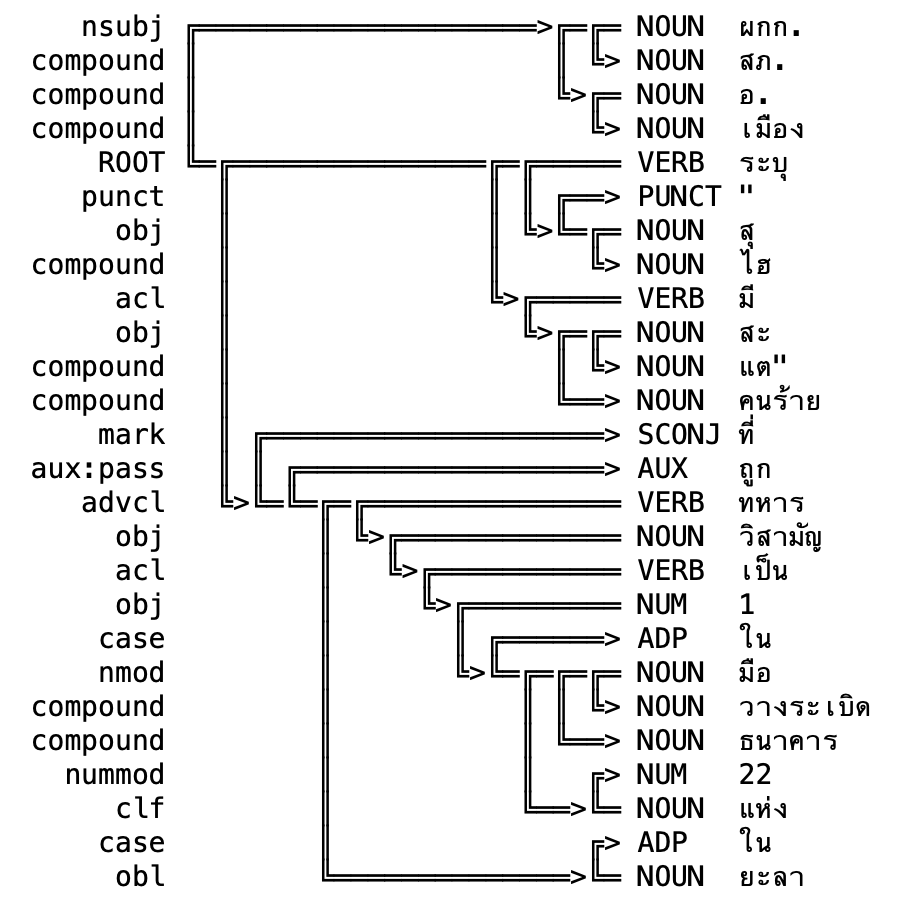

# Install font

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

In [ ]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

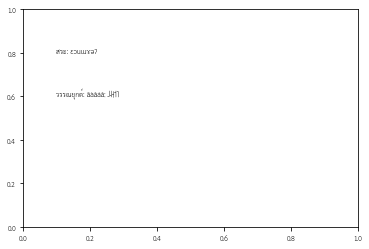

In [ ]:
import matplotlib.pyplot as plt
plt.text(0.1, 0.8,'สระ: ɛɔuɯɤəʔ ')
plt.text(0.1, 0.6,'วรรณยุกต์: āàâáǎː ˩˨˧˦˥');

# Building knowledge graph

In [ ]:
import pandas as pd
from tqdm import tqdm
part1df = pd.read_csv('cleaner_csv.csv')
part2df = pd.read_csv('mc_cleaner.csv')

In [ ]:
part2df.columns = part1df.columns

In [ ]:
cleaned_df = pd.concat([part1df, part2df]).drop_duplicates().reset_index(drop=True)
cleaned_df

,From,Verb,To
0,จีน,เมิน,IMF
1,รัสเซีย,เป็น,ผู้เล่นคนสำคัญของตลาดโลก
2,รัสเซีย,ส่งออก,ก๊าซธรรมชาติ
3,รัสเซีย,เป็น,ผู้ส่งออกก๊าซธรรมชาติ
4,ภูสิต รัตนกุล เสรีเริงฤทธิ์,เป็น,อธิบดีกรมเจรจาการค้าระหว่างประเทศ
...,...,...,...
599,กลุ่มกบฎ,ก่อเหตุโจมตีด้วย,อาวุธหนัก ทั้งปืนใหญ่
600,กลุ่มกบฎ,โจมตี 96 ครั้ง,ทางทหารของยูเครน
601,วลาดิมีร์ ปูติน,เป็น,ประธานาธิบดี
602,วลาดิมีร์ ปูติน,เป็นคน,รัสเซีย


In [ ]:
def generate_label(df):
  test_dict = {}
  for i in range(df.shape[0]):
    test_dict[(df.iloc[i,0], df.iloc[i,2])] = df.iloc[i,1]
  return test_dict

{('ETF',
  'การลงทุนThematic'): Text(0.15157119256885232, 0.3915102345504614, 'มีการลงทุนแบบ'),
 ('FAST AND FEEL LOVE',
  'ญาญ่า-อุรัสยา เสปอร์บันด์'): Text(0.6286566152506065, 0.4706085358594817, 'แสดงนำโดย'),
 ('FAST AND FEEL LOVE',
  'นัท-ณัฏฐ์ กิจจริต'): Text(0.6129120702536193, -0.2848084235712054, 'แสดงนำโดย'),
 ('FAST AND FEEL LOVE',
  'เต๋อ-นวพล ธำรงรัตนฤทธิ์'): Text(0.39000923415505484, 0.31590891700729384, 'เป็นภาพยนตร์ลำดับที่ 8 ของ'),
 ('Gazprom',
  'ก๊าซธรรมชาติ'): Text(-0.18119738138218858, 0.02818141027893116, 'ผลิต'),
 ('Gazprom',
  'บริษัทผลิตน้ำมัน'): Text(0.5143533476378543, 0.19116364828801796, 'เป็น'),
 ('Gazprom',
  'บริษัทผลิตไฟฟ้า'): Text(0.2688212965326658, -0.43021831993593956, 'เป็น'),
 ('Gazprom',
  'ปริมาณสำรองก๊าซธรรมชาติสูง'): Text(-0.26320234617673355, -0.3346436773746187, 'มี'),
 ('Gazprom',
  'ระบบท่อส่งก๊าซธรรมชาติที่ใหญ่'): Text(0.58128985888085, 0.017897896971567573, 'มี'),
 ('Ghost Lab',
  'จีดีเอช'): Text(0.20811062367794253, -0.3287398748181637, 

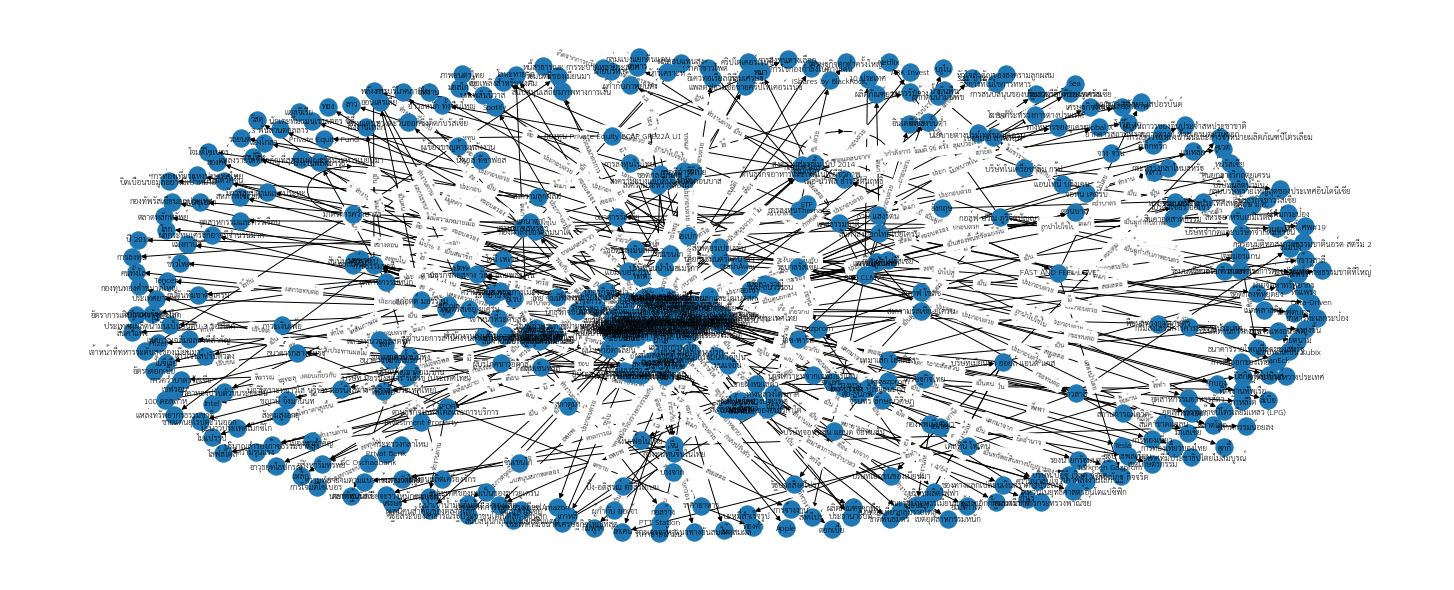

In [ ]:
selected_df = cleaned_df.copy() 

import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.rcParams['font.family'] = 'TH Sarabun Chula'
G = nx.MultiDiGraph()
for ind in selected_df.index:
  G.add_edge(selected_df.iloc[ind,0], selected_df.iloc[ind,2])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_family= 'TH Sarabun Chula')


test_dict = generate_label(selected_df)
nx.draw_networkx_edge_labels(G, pos,
                            edge_labels = test_dict,
                            font_color = 'black', font_family = 'TH Sarabun Chula')

# Graph analysis

### Jaccard distance link prediction

In [ ]:
def directedJaccard(graphObj, start, end, showlog = False):
  A_dict = {}
  B_dict = {}
  unionlinks = 0
  intersectionlinks = 0
  if showlog: print("Printing",start)
  for node, links in dict(graphObj.adj[start]).items():
    if showlog: print("Found %d links to %s node" % (len(links), node))
    A_dict[node] = len(links)
    unionlinks += len(links)
  if showlog: print("Printing",end)
  for node, links in dict(graphObj.adj[end]).items():
    if showlog: print("Found %d links to %s node" % (len(links), node))
    B_dict[node] = len(links)
    unionlinks += len(links)
  A_node = set(A_dict.keys())
  B_node = set(B_dict.keys())

  intersection = A_node & B_node
  for node in intersection:
    intersectionlinks += A_dict[node] + B_dict[node]
  return intersectionlinks / unionlinks

In [ ]:
allPossibleLine = [(first, second) for first in G.nodes() for second in G.nodes()]
len(allPossibleLine)

219961

In [ ]:
directedJaccard_dict = {'From':[], 'To':[], 'Prob':[]}
for onePossibleLine in tqdm(allPossibleLine):
  if onePossibleLine[0]!=onePossibleLine[1] and (onePossibleLine[0],onePossibleLine[1]) not in G.edges() and (onePossibleLine[1],onePossibleLine[0]) not in G.edges():
    first = onePossibleLine[0]
    second = onePossibleLine[1]
    try:
      first_adj = len(G.adj[first])
    except:
      continue
    try:
      second_adj = len(G.adj[second])
    except:
      continue
    if first_adj>0 and second_adj>0:
      directedJaccard_dict['From'].append(first)
      directedJaccard_dict['To'].append(second)
      directedJaccard_dict['Prob'].append(directedJaccard(G,first,second))
    else:
      continue
  else:
    continue

100%|██████████| 219961/219961 [00:07<00:00, 27602.34it/s]


In [ ]:
problist = pd.DataFrame.from_dict(directedJaccard_dict)
problist[problist['Prob']>0.5].sort_values('Prob',ascending=False)

,From,To,Prob
36430,รองผู้อำนวยการฝ่ายนโยบายโครงสร้างเศรษฐกิจ ธนาค...,คณะกรรมการฝ่ายอิตาลี,1.000000
45060,ซุปเปอร์มาร์เก็ต,เมืองมิลาน,1.000000
33484,สภาหอการค้าแห่งประเทศไทย,คณะกรรมการฝ่ายไทย,1.000000
33475,สภาหอการค้าแห่งประเทศไทย,คณะกรรมการฝ่ายอิตาลี,1.000000
33470,สภาหอการค้าแห่งประเทศไทย,รองผู้อำนวยการฝ่ายนโยบายโครงสร้างเศรษฐกิจ ธนาค...,1.000000
...,...,...,...
777,ก๊าซธรรมชาติ,ประธานาธิบดีรัสเซีย,0.600000
43838,ผู้บริโภคชาวอิตาลี,ผู้นำเข้าอิตาเลียน,0.571429
52371,ตลาดส่งออกของยูเครน,สงครามลูกผสม,0.571429
45790,ผู้นำเข้าอิตาเลียน,ผู้บริโภคชาวอิตาลี,0.571429


In [ ]:
directedJaccard(G,"สงครามลูกผสม","ตลาดส่งออกของยูเครน", showlog=True)

Printing สงครามลูกผสม
Found 1 links to รัสเซีย node
Found 1 links to ยูเครน node
Found 1 links to ทหารรับจ้าง node
Found 1 links to โจมตีไซเบอร์ node
Found 1 links to บิดเบือนข้อมูลอย่างมีเป้าหมาย node
Printing ตลาดส่งออกของยูเครน
Found 1 links to รัสเซีย node
Found 1 links to ยูเครน node


0.5714285714285714

In [ ]:
problist.to_csv('Link_prediction.csv',index=False)

### Pagerank (Centrality analysis)

In [ ]:
pr_G = nx.pagerank(G)

In [ ]:
pr_df = pd.DataFrame.from_dict(pr_G, orient='index',columns=['Centrality'])
pr_df

,Centrality
จีน,0.005002
IMF,0.002515
รัสเซีย,0.034027
ผู้เล่นคนสำคัญของตลาดโลก,0.001773
ก๊าซธรรมชาติ,0.020117
...,...
กลุ่มแบ่งแย่งดินแดน,0.001031
สงครามระหว่างสองฝั่ง,0.001031
นักเตะทีมแมนเชนเตอร์ ซิตี้,0.001250
อาวุธหนัก ทั้งปืนใหญ่,0.001437


In [ ]:
pr_df.reset_index(inplace=True)
pr_df.columns = ['Node','Centrality']

In [ ]:
pr_df.sort_values('Centrality',ascending=False)

,Node,Centrality
2,รัสเซีย,0.034027
41,ไทย,0.030478
254,การประชุมอิตาเลียน-ไทย บิสซิเนส ฟอรั่ม,0.022937
25,สหภาพยุโรป,0.020577
249,อิตาลี,0.020162
...,...,...
383,อุตสาหกรรมหนัก,0.001031
256,สภาหอการค้าแห่งประเทศไทย,0.001031
257,สถานทูตอิตาลีประจำประเทศไทย,0.001031
261,อรมน ทรัพย์ทวีธรรม,0.001031


In [ ]:
pr_df.to_csv('Centrality_prediction.csv',index=False)

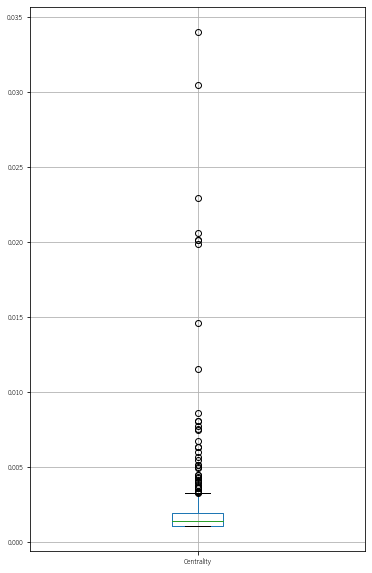

In [ ]:
plt.figure(figsize=(6,10))
pr_df.boxplot(column='Centrality')

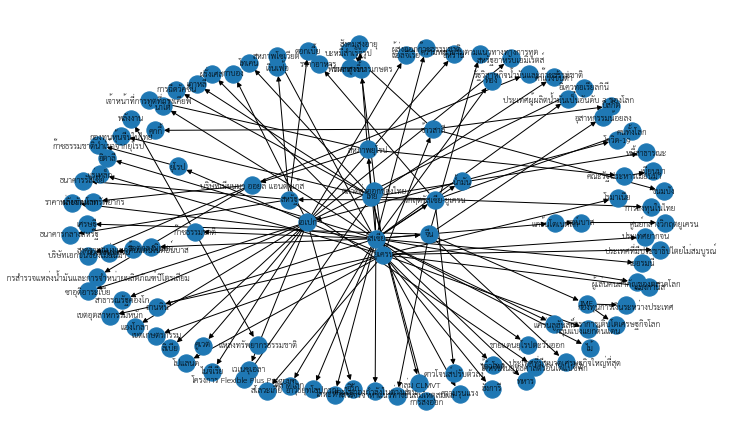

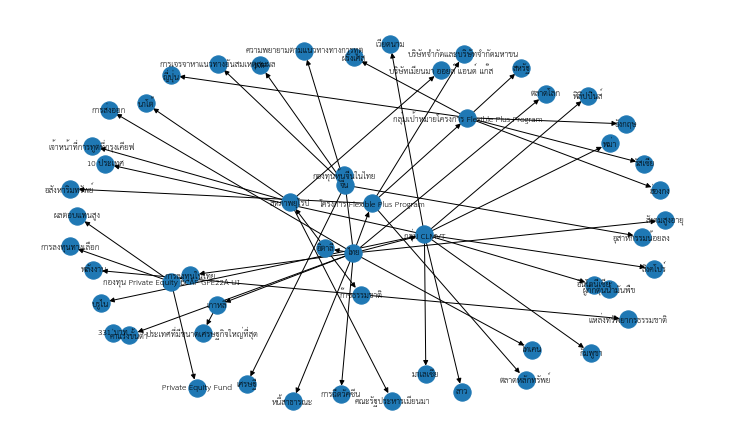

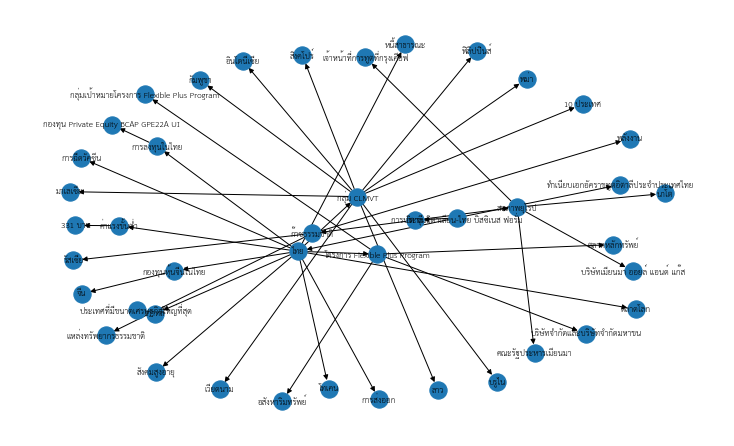

In [ ]:
for node in pr_df.sort_values('Centrality', ascending=False).head(3).index:
  DFS_G = nx.algorithms.traversal.breadth_first_search.bfs_tree(G, source=node, depth_limit = 3)
  plt.figure(figsize=(10,6))
  DFS_pos = nx.spring_layout(DFS_G)
  nx.draw(DFS_G, DFS_pos, with_labels=True, font_family= 'TH Sarabun Chula')

# To JSON (For front-end development)

In [ ]:
output_dict = {'From':[], 'Verb':[], 'To':[]}
output_dict['From'] = cleaned_df['From'].tolist()
output_dict['Verb'] = cleaned_df['Verb'].tolist()
output_dict['To'] = cleaned_df['To'].tolist()

In [ ]:
import json
with open('to_frontend.json', 'w', encoding='utf8') as json_file:
    json.dump(output_dict, json_file, ensure_ascii=False)